In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data for first exercise
Even though it might be kinda pointless to use pandas at all

In [3]:
data1 = pd.read_csv(filepath_or_buffer='ex1data1.txt', header = None, names = ['Population','Profit'])

### Do standard exploration stuff

In [4]:
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


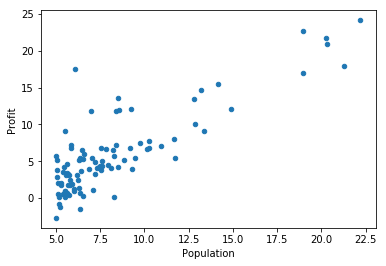

In [9]:
data1.plot(x='Population', y='Profit', kind='scatter')
plt.show()

## Now for the important functions

In [240]:
def J(X,y,thetas):
    m = X.shape[0]
    return sum((X@thetas-y)**2)/(2*m)

def gradient_descent(X, y, alpha = 0.01, iterations = 100):
    m = X.shape[0]
    num_j = X.shape[1]
    thetas = 2*(np.random.rand(num_j,1)-0.5) #random initialization of theta
    new_thetas = np.zeros_like(thetas)
    J_list = []
    for _ in range(iterations):
        for j in range(num_j):
            grad = np.dot((X@thetas - y).T,X[:,j].reshape((-1,1)))
            new_thetas[j] = thetas[j] - alpha*grad/m
        thetas = new_thetas
        J_list.append(J(X,y,thetas))
    return thetas, J_list

In [225]:
X = data1.Population.values
X = np.reshape(X,newshape=(X.size,1))
X = np.block([np.ones((X.shape[0],1)),X])

y = data1.Profit.values
y = np.reshape(y,(y.shape[0],1))

In [149]:
thetas, J_list = gradient_descent(X,y, iterations = 800, alpha = 0.02)

After playing with the parameters a bit, I think alpha = 0.02 is close enough to optimal

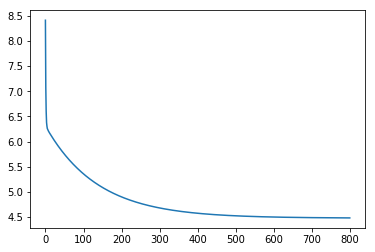

In [150]:
plt.plot(J_list)
plt.show()

### It fits!

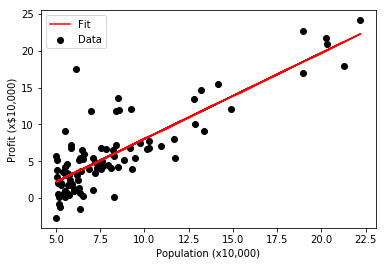

In [156]:
plt.scatter(X[:,1],y,c='k')
plt.plot(X[:,1],X@thetas,'r')
plt.legend(['Fit','Data'])
plt.xlabel('Population (x10,000)')
plt.ylabel('Profit (x$10,000)')
plt.show()

# Now for the next data set
This one is significantly harder to visualize

In [200]:
data2 = pd.read_csv('ex1data2.txt', header=None, names = ['sq_footage', 'num_bed', 'price'])

In [190]:
data2.head()

,sq_footage,num_bed,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


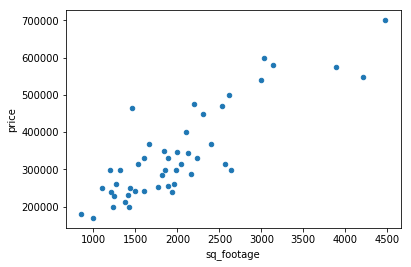

In [165]:
data2.plot(x = 'sq_footage', y = 'price', kind='scatter')
plt.show()

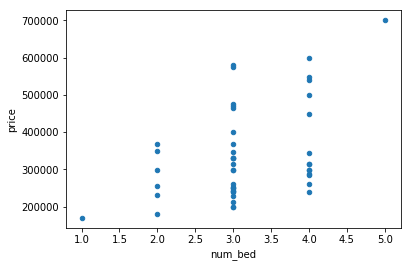

In [166]:
data2.plot(x = 'num_bed', y = 'price', kind='scatter')
plt.show()

In [191]:
def normalize(X):
    for j in range(X.shape[1]):
        X[:,j] = np.copy((X[:,j]-np.mean(X[:,j]))/np.float(np.max(X[:,j])-np.min(X[:,j])))
    return X

In [238]:
X = np.float32(data2.values).copy()
X = normalize(X)
X = np.block([np.ones((X.shape[0],1)),X])
y = X[:,3].reshape((-1,1))
X = X[:,0:3]

In [253]:
thetas, J_list = gradient_descent(X,y,iterations=100, alpha = 1)

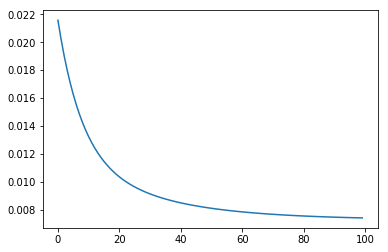

In [254]:
plt.plot(J_list)
plt.show()

Not sure how to visualize that my thetas fit the data very well. I'm open to suggestions. 